In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

import nltk
nltk.download('wordnet')
import time
import itertools

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string

import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix, accuracy_score
from joblib import dump, load

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Polyhack2023/labeled_data.csv')

In [ ]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
data.tail()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies
24782,25296,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [ ]:
data.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [ ]:
data = data[["tweet", "class"]]

In [ ]:
data.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [ ]:
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Making Dictionary For Class Lables

In [ ]:
dic={0:'Hate',
     1:'Offensive',
     2:'None'}

#Data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24783 non-null  object
 1   class   24783 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


In [ ]:
data.describe()

,class
count,24783.000000
mean,1.110277
std,0.462089
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [ ]:
y=data['class'].values
print(y)
print(data)

[2 1 1 ... 1 1 2]
                                                   tweet  class
0      !!! RT @mayasolovely: As a woman you shouldn't...      2
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...      1
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...      1
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...      1
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...      1
...                                                  ...    ...
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...      1
24779  you've gone and broke the wrong heart baby, an...      2
24780  young buck wanna eat!!.. dat nigguh like I ain...      1
24781              youu got wild bitches tellin you lies      1
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...      2

[24783 rows x 2 columns]


[Text(0, 0, 'hate'), Text(1, 0, 'offensive'), Text(2, 0, 'None')]

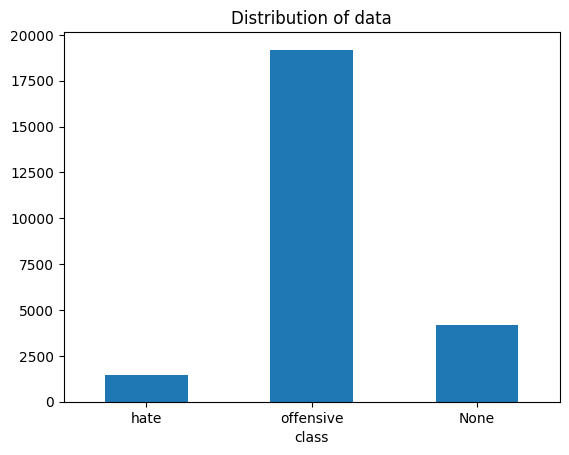

In [ ]:

rr = data.groupby('class').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
rr.set_xticklabels(['hate','offensive','None'], rotation=0)

#Cleaning the text

In [ ]:
#Preprocessing Data

def preprocess(textdata):
    processedText = []

    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()

    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    newlinepattern = '\n'




    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)


        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace all new line with " "
        tweet = re.sub(newlinepattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
                if len(word)>1:
                    # Lemmatizing the word.
                    word = wordLemm.lemmatize(word)
                    tweetwords += (word+' ')

        processedText.append(tweetwords)

    return processedText


t = time.time()
corpus = preprocess(data['tweet'])
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 3 seconds


In [ ]:
cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(corpus).toarray()

#Splitting the dataset into the Training set and Test set

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Finding the best model for training

Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression

In [ ]:

model1 = LogisticRegression()
model1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#make predictions on validation set
preds1 = model1.predict(X_test)

In [ ]:
#check performance of the model
print(classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.45      0.24      0.31       279
           1       0.93      0.96      0.94      3852
           2       0.85      0.89      0.87       826

    accuracy                           0.90      4957
   macro avg       0.74      0.70      0.71      4957
weighted avg       0.89      0.90      0.90      4957



['logistic.joblib']

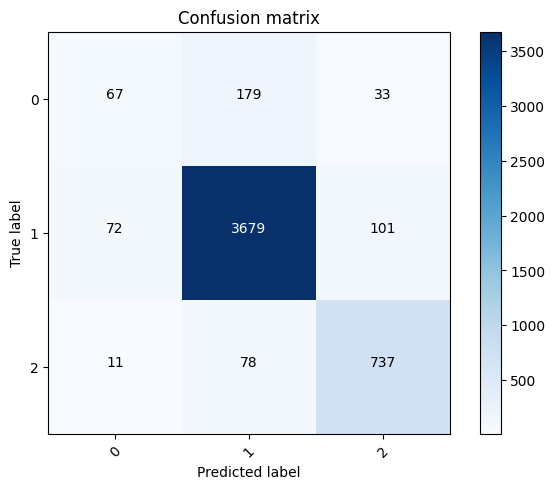

In [ ]:
#confusion matrix

y_pred_np = model1.predict(X_test)
cm = confusion_matrix(y_test, y_pred_np)
plot_confusion_matrix(cm, classes = range(3))
dump(model1, 'logistic.joblib')

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:

#make predictions on validation set
preds2 = model2.predict(X_test)

In [ ]:
#check performance of the model
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.28      0.28      0.28       279
           1       0.92      0.92      0.92      3852
           2       0.83      0.83      0.83       826

    accuracy                           0.87      4957
   macro avg       0.68      0.68      0.68      4957
weighted avg       0.87      0.87      0.87      4957



['decision.joblib']

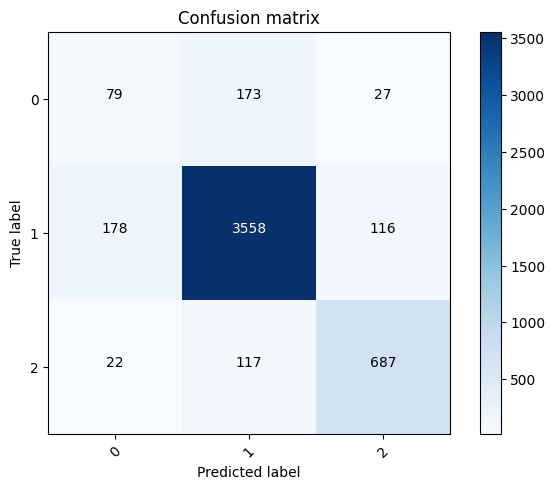

In [ ]:
#confusion matrix

y_pred_np = model2.predict(X_test)
cm = confusion_matrix(y_test, y_pred_np)
plot_confusion_matrix(cm, classes = range(3))
dump(model2, 'decision.joblib')

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model3 =RandomForestClassifier()
model3.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#make predictions on validation set
preds3 = model3.predict(X_test)

In [ ]:
#check performance of the model
print(classification_report(y_test, preds3))

              precision    recall  f1-score   support

           0       0.46      0.17      0.25       279
           1       0.92      0.96      0.94      3852
           2       0.84      0.85      0.85       826

    accuracy                           0.90      4957
   macro avg       0.74      0.66      0.68      4957
weighted avg       0.88      0.90      0.88      4957



['randomf.joblib']

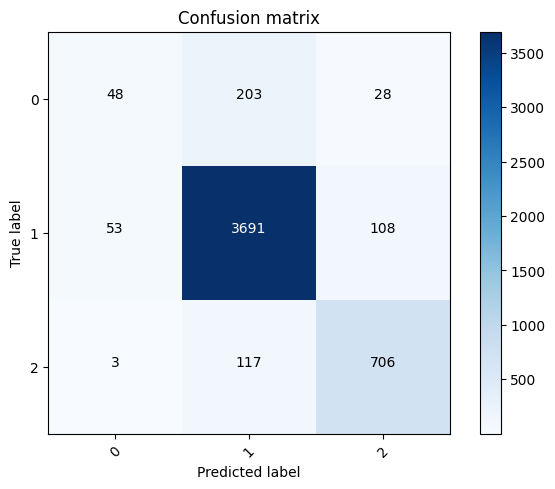

In [ ]:
#confusion matrix

y_pred_np = model3.predict(X_test)
cm = confusion_matrix(y_test, y_pred_np)
plot_confusion_matrix(cm, classes = range(3))
dump(model3, 'randomf.joblib')

#Testing the data

In [ ]:
# testing data with custom input

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text)).toarray()
    sentiment = model.predict(textdata)

    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))

    # Convert the list into a Pandas DataFrame.
    data = pd.DataFrame(data, columns = ['tweet','class'])
    data = data.replace([0,1,2], ["Hate","Offensive","Neither"])
    return data

test_data = ["I hate you","becareful bitch", "Fuck you man i hate you", "i love you", "You have a horrible body"]
result=predict(cv,model1,test_data)
print(result)

                      tweet      class
0                I hate you  Offensive
1           becareful bitch  Offensive
2   Fuck you man i hate you  Offensive
3                i love you    Neither
4  You have a horrible body  Offensive


It is best to conclude that logistic regression work best to predict hate speech and offensive language.

#Converting the labels into categorical format

In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train, num_classes = 3, dtype='float32')
y_test=to_categorical(y_test, num_classes = 3, dtype='float32')

#Creating and Training an LSTM Model

In [ ]:
from keras.models import Sequential
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding

In [ ]:
model = Sequential()
model.add(Embedding(232337, 100, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
310/310 [==============================] - 1337s 4s/step - loss: 0.4198 - accuracy: 0.7710 - val_loss: 0.3995 - val_accuracy: 0.7771
Epoch 2/10
310/310 [==============================] - 1338s 4s/step - loss: 0.4037 - accuracy: 0.7736 - val_loss: 0.3994 - val_accuracy: 0.7771
Epoch 3/10
310/310 [==============================] - 1343s 4s/step - loss: 0.4037 - accuracy: 0.7736 - val_loss: 0.3997 - val_accuracy: 0.7771
Epoch 4/10
310/310 [==============================] - 1350s 4s/step - loss: 0.4036 - accuracy: 0.7736 - val_loss: 0.3997 - val_accuracy: 0.7771
Epoch 5/10
310/310 [==============================] - 1340s 4s/step - loss: 0.4036 - accuracy: 0.7736 - val_loss: 0.3993 - val_accuracy: 0.7771
Epoch 6/10
310/310 [==============================] - 1341s 4s/step - loss: 0.4036 - accuracy: 0.7736 - val_loss: 0.3995 - val_accuracy: 0.7771
Epoch 7/10
310/310 [==============================] - 1336s 4s/step - loss: 0.4035 - accuracy: 0.7736 - val_loss: 0.3994 - val_accuracy:

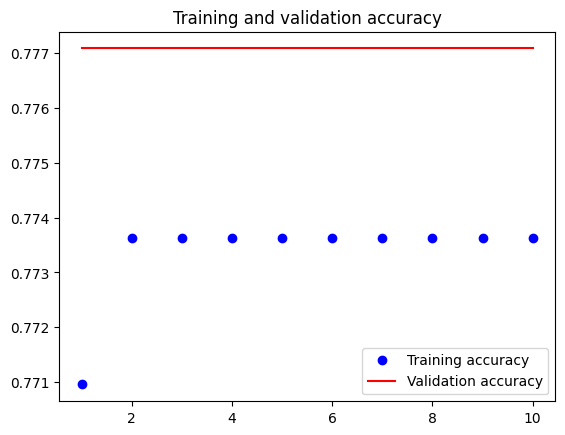

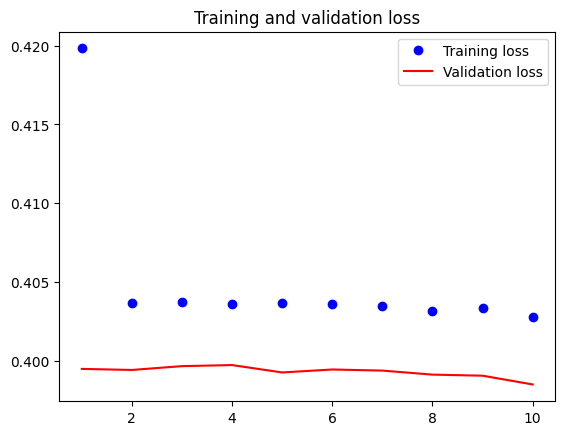

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#Saving the model

In [ ]:
model.save('AI_model.h5')